## Below cells are commented, becaue preprocessing is not need. 

In [1]:
# import pickle



# import numpy as np



# import os







# def load_cifar10_batch(file):



#     with open(file, 'rb') as f:



#         data_dict = pickle.load(f, encoding='bytes')



#         images = data_dict[b'data']



#         labels = data_dict[b'labels']



#         images = images.reshape(len(images), 3, 32, 32).transpose(0, 2, 3, 1).astype("float")



#         labels = np.array(labels)



#         return images, labels







# def load_cifar10_data(data_dir):



#     # Load all batches



#     images, labels = [], []



#     for batch_id in range(1, 6):



#         file = os.path.join(data_dir, f'data_batch_{batch_id}')



#         batch_images, batch_labels = load_cifar10_batch(file)



#         images.append(batch_images)



#         labels.append(batch_labels)



    



#     # Concatenate all batches into training set



#     train_images = np.concatenate(images)



#     train_labels = np.concatenate(labels)



    



#     # Load test batch



#     test_images, test_labels = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))



    



#     return train_images, train_labels, test_images, test_labels







# data_dir = r"C:\Users\samee\Desktop\University\FAST\Semester 9\GenAI\Assignments\Ass3\cifar-10-batches-py"



# train_images, train_labels, test_images, test_labels = load_cifar10_data(data_dir)







# print(f"Training images shape: {train_images.shape}")



# print(f"Training labels shape: {train_labels.shape}")



# print(f"Testing images shape: {test_images.shape}")



# print(f"Testing labels shape: {test_labels.shape}")


In [2]:
# import matplotlib.pyplot as plt



# import random







# # CIFAR-10 class labels



# cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']







# # Function to display images with labels using Matplotlib



# def display_images_with_matplotlib(images, labels, num_images=5):



#     plt.figure(figsize=(10, 5))



#     for i in range(num_images):



#         index = random.randint(0, len(images) - 1)



#         image = images[index].astype(np.uint8)



#         label = cifar10_labels[labels[index]]



        



#         plt.subplot(1, num_images, i + 1)



#         plt.imshow(image)



#         plt.title(label)



#         plt.axis('off')



    



#     plt.show()







# # Display a few images with labels



# display_images_with_matplotlib(train_images, train_labels, num_images=5)


### Loading and transforming images

In [3]:
import pickle



import numpy as np



import torch



from torch.utils.data import Dataset, DataLoader



from torchvision import transforms



from tqdm import tqdm







class CIFAR10InMemoryDataset(Dataset):



    def __init__(self, data, labels, transform=None):



        self.data = data



        self.labels = labels



        self.transform = transform



    



    def __len__(self):



        return len(self.data)



    



    def __getitem__(self, idx):



        image = self.data[idx]



        label = self.labels[idx]



        if self.transform:



            image = self.transform(image)



        return image, label







# Preload data into memory



def load_cifar10_in_memory(data_dir):



    images, labels = [], []



    for i in range(1, 6):



        with open(f"{data_dir}/data_batch_{i}", 'rb') as f:



            batch = pickle.load(f, encoding='bytes')



            images.append(batch[b'data'])



            labels.extend(batch[b'labels'])



    images = np.vstack(images).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Reshape and reorder dimensions



    labels = np.array(labels)







    # Load test data



    with open(f"{data_dir}/test_batch", 'rb') as f:



        batch = pickle.load(f, encoding='bytes')



        test_images = batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)



        test_labels = np.array(batch[b'labels'])



        



    return images, labels, test_images, test_labels







# Load CIFAR-10 data into memory



data_dir = r"/kaggle/input/cifar-dataset/cifar-10-batches-py"

# data_dir = r"C:\Users\samee\Desktop\University\FAST\Semester 9\GenAI\Assignments\Ass3\cifar-10-batches-py"



train_images, train_labels, test_images, test_labels = load_cifar10_in_memory(data_dir)







# Define simple transforms



train_transforms = transforms.Compose([



    transforms.ToTensor(),



    transforms.RandomCrop(32, padding=4),



    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),



    transforms.RandomHorizontalFlip(),



    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))



])







test_transforms = transforms.Compose([



    transforms.ToTensor(),



    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))



])







# Create in-memory datasets



train_dataset = CIFAR10InMemoryDataset(train_images, train_labels, transform=train_transforms)



test_dataset = CIFAR10InMemoryDataset(test_images, test_labels, transform=test_transforms)







# Create DataLoaders with fewer workers



train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=0)



test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=0)


Image 1 - Pixel Values:
 [[[0.42674005 0.43652177 0.48578143]
  [0.43873003 0.43914446 0.49332777]
  [0.37262374 0.36972684 0.42803004]
  ...
  [0.90162754 0.9169276  0.9494711 ]
  [0.06882209 0.07201007 0.1112794 ]
  [0.06882209 0.07201007 0.1112794 ]]

 [[0.41904563 0.42746937 0.47446996]
  [0.42835504 0.42377663 0.47451496]
  [0.35482052 0.35041866 0.40530825]
  ...
  [0.90162754 0.9169276  0.9494711 ]
  [0.06882209 0.07201007 0.1112794 ]
  [0.06882209 0.07201007 0.1112794 ]]

 [[0.4148284  0.41585675 0.45842856]
  [0.40687108 0.4005919  0.44575745]
  [0.36605448 0.3582201  0.41304755]
  ...
  [0.90162754 0.9169276  0.9494711 ]
  [0.06882209 0.07201007 0.1112794 ]
  [0.06882209 0.07201007 0.1112794 ]]

 ...

 [[0.1350461  0.1672875  0.2171719 ]
  [0.1381801  0.15262976 0.23102808]
  [0.13807213 0.15348172 0.21308291]
  ...
  [0.5732266  0.54779124 0.59206724]
  [0.06882209 0.07201007 0.1112794 ]
  [0.06882209 0.07201007 0.1112794 ]]

 [[0.16590688 0.20482734 0.26606873]
  [0.1621966

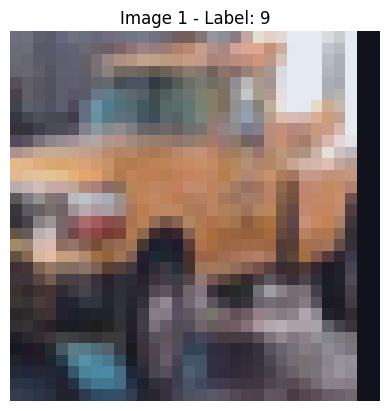

Image 2 - Pixel Values:
 [[[0.07170063 0.07493043 0.11417654]
  [0.07170063 0.07493043 0.11417654]
  [0.07170063 0.07493043 0.11417654]
  ...
  [0.07170063 0.07493043 0.11417654]
  [0.07170063 0.07493043 0.11417654]
  [0.07170063 0.07493043 0.11417654]]

 [[0.64584523 0.5287392  0.20704773]
  [0.5399288  0.4856778  0.29376265]
  [0.40835524 0.41203594 0.31056488]
  ...
  [0.23190433 0.23213193 0.1906285 ]
  [0.2678969  0.2597102  0.2065047 ]
  [0.3172233  0.2905602  0.2358011 ]]

 [[0.48487347 0.4132651  0.17730406]
  [0.31384745 0.3044156  0.16796464]
  [0.2615115  0.26752537 0.17296922]
  ...
  [0.33658317 0.33475113 0.22815406]
  [0.375794   0.36252588 0.25066093]
  [0.3794462  0.34536877 0.2509452 ]]

 ...

 [[0.17628816 0.17411998 0.18552539]
  [0.14192581 0.1478455  0.16955361]
  [0.14773649 0.15444079 0.18287942]
  ...
  [0.5522547  0.52217233 0.47235253]
  [0.5653312  0.53307045 0.49568823]
  [0.4968171  0.4635599  0.42673102]]

 [[0.15358812 0.14390233 0.159287  ]
  [0.1012384

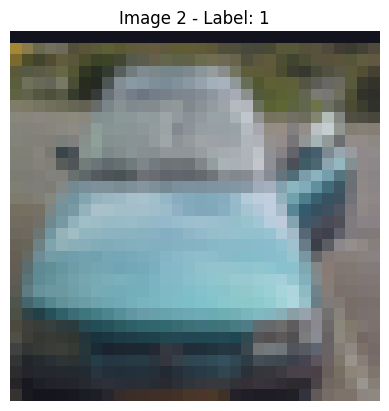

Image 3 - Pixel Values:
 [[[0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  ...
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]]

 [[0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  ...
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]]

 [[0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  ...
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]]

 ...

 [[0.01907378 0.02153826 0.06120938]
  [0.01907378 0.02153826 0.06120938]
  [0.57737035 0.58796394 0.6515724 ]
  ...
  [0.11808512 0.11948735 0.09130284]
  [0.15690824 0.15887514 0.13037708]
  [0.17169863 0.1763637  0.15791005]]

 [[0.01907378 0.02153826 0.06120938]
  [0.0190737

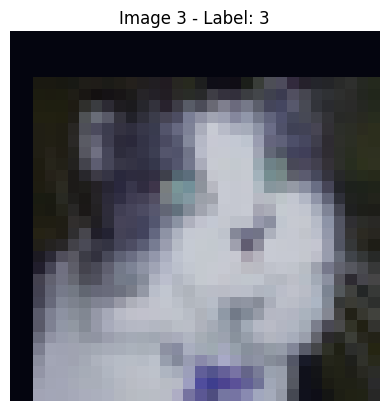

In [4]:
import matplotlib.pyplot as plt







# Display pixel values of a few images



def display_image_values(loader, num_images=5):



    images, labels = next(iter(loader))  # Get a batch of images and labels



    images = images[:num_images]  # Select the first few images



    



    for i in range(num_images):



        image = images[i].permute(1, 2, 0).numpy()  # Convert to HxWxC format and to numpy array



        image = (image * 0.2023 + 0.4914)  # De-normalize using CIFAR-10 mean and std for display







        print(f"Image {i + 1} - Pixel Values:\n", image)  # Display pixel values



        plt.imshow(image)



        plt.title(f"Image {i + 1} - Label: {labels[i].item()}")



        plt.axis('off')



        plt.show()







# Display pixel values for images in the training loader



display_image_values(train_loader, num_images=3)


### Implementing the Model ViT

In [5]:
import torch.nn.functional as F



import torch



import torch.nn as nn



import torch.optim as optim



import torch.nn.functional as F



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



import matplotlib.pyplot as plt



import seaborn as sns







class PatchEmbedding(nn.Module):



    def __init__(self, img_size=32, patch_size=4, in_channels=3, embed_dim=64):



        super().__init__()



        self.num_patches = (img_size // patch_size) ** 2



        self.patch_dim = in_channels * patch_size * patch_size



        self.projection = nn.Linear(self.patch_dim, embed_dim)



        



    def forward(self, x):



        batch_size, channels, height, width = x.shape



        patches = x.unfold(2, 4, 4).unfold(3, 4, 4)



        patches = patches.contiguous().view(batch_size, -1, self.patch_dim)



        embeddings = self.projection(patches)



        return embeddings







class PositionalEncoding(nn.Module):



    def __init__(self, embed_dim, num_patches):



        super().__init__()



        self.positional_encoding = nn.Parameter(torch.randn(1, num_patches, embed_dim))







    def forward(self, x):



        return x + self.positional_encoding





class MultiHeadSelfAttention(nn.Module):



    def __init__(self, embed_dim, num_heads, dropout=0.1):



        super().__init__()



        self.num_heads = num_heads



        self.attention = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)  # Dropout within attention



        self.dropout = nn.Dropout(dropout)  # Dropout after attention output



        



    def forward(self, x):



        x = x.transpose(0, 1)  # Required shape: (sequence_length, batch_size, embed_dim)



        attn_output, _ = self.attention(x, x, x)



        attn_output = self.dropout(attn_output)  # Apply dropout after attention output



        return attn_output.transpose(0, 1)  # Back to (batch_size, sequence_length, embed_dim)







class TransformerEncoderLayer(nn.Module):



    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):



        super().__init__()



        self.self_attn = MultiHeadSelfAttention(embed_dim, num_heads, dropout=dropout)



        self.norm1 = nn.LayerNorm(embed_dim)



        self.norm2 = nn.LayerNorm(embed_dim)



        self.dropout1 = nn.Dropout(dropout)  # Dropout after first residual connection



        self.fc = nn.Sequential(



            nn.Linear(embed_dim, hidden_dim),



            nn.GELU(),



            nn.Dropout(dropout),  # Dropout within feed-forward network



            nn.Linear(hidden_dim, embed_dim)



        )



        self.dropout2 = nn.Dropout(dropout)  # Dropout after second residual connection







    def forward(self, x):



        # Self-attention with dropout and residual connection



        x = x + self.dropout1(self.self_attn(x))



        x = self.norm1(x)



        



        # Feed-forward network with dropout and residual connection



        x = x + self.dropout2(self.fc(x))



        x = self.norm2(x)



        return x







class VisionTransformer(nn.Module):



    def __init__(self, img_size=32, patch_size=4, in_channels=3, embed_dim=64, num_heads=4, num_layers=6, num_classes=10, dropout=0.1):



        super().__init__()



        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)



        self.pos_encoding = PositionalEncoding(embed_dim, self.patch_embed.num_patches)



        self.transformer_layers = nn.Sequential(



            *[TransformerEncoderLayer(embed_dim, num_heads, embed_dim * 2, dropout=dropout) for _ in range(num_layers)]



        )



        self.classifier = nn.Linear(embed_dim, num_classes)







    def forward(self, x):



        x = self.patch_embed(x)



        x = self.pos_encoding(x)



        x = self.transformer_layers(x)



        x = x.mean(dim=1)  # Global average pooling over sequence length



        return self.classifier(x)


















In [6]:
from tqdm import tqdm

import torch

import torch.nn as nn

import torch.optim as optim

import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Initialize model, criterion, optimizer, and scheduler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



# Adjust model complexity by reducing embed_dim, num_heads, and num_layers

model = VisionTransformer(img_size=32, patch_size=4, in_channels=3, embed_dim=64, num_heads=4, num_layers=8, num_classes=10, dropout=0.1).to(device)



# Define criterion

criterion = nn.CrossEntropyLoss()



# Lower learning rate and increase weight decay

optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.01)



# Learning rate scheduler with reduced step size and decay rate

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)



# Early stopping parameters

patience = 5

best_loss = np.inf

epochs_no_improve = 0



# Lists to store loss values for plotting

train_losses = []

val_losses = []



# Training function

def train(model, loader):

    model.train()

    total_loss = 0

    for images, labels in tqdm(loader, desc="Training"):

        images, labels = images.to(device), labels.to(device).long()

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        total_loss += loss.item()

    scheduler.step()  # Step the scheduler

    return total_loss / len(loader)



# Evaluation function with softmax for probabilities

def evaluate(model, loader):

    model.eval()

    preds, true_labels, logits_list = [], [], []

    with torch.no_grad():

        for images, labels in tqdm(loader, desc="Evaluating"):

            images, labels = images.to(device), labels.to(device).long()

            outputs = model(images)  # Raw logits

            logits_list.extend(outputs)  # Store logits for loss calculation

            probs = torch.softmax(outputs, dim=1)  # Apply softmax to get probabilities

            _, predicted = torch.max(probs, 1)  # Get predicted classes

            preds.extend(predicted.cpu().numpy())

            true_labels.extend(labels.cpu().numpy())

    return preds, true_labels, logits_list



# Training loop with early stopping and loss tracking

n_epochs = 30



for epoch in range(n_epochs):

    # Training step

    train_loss = train(model, train_loader)

    train_losses.append(train_loss)  # Store training loss for this epoch

    print(f"Epoch {epoch + 1}, Training Loss: {train_loss:.4f}")

    

    # Validation step

    preds, true_labels, logits_list = evaluate(model, test_loader)

    accuracy = accuracy_score(true_labels, preds)

    precision = precision_score(true_labels, preds, average='macro')

    recall = recall_score(true_labels, preds, average='macro')

    f1 = f1_score(true_labels, preds, average='macro')

    

    # Calculate validation loss using logits (no softmax here, just logits)

    val_loss = criterion(torch.stack(logits_list).to(device), torch.tensor(true_labels).to(device).long()).item()

    val_losses.append(val_loss)  # Store validation loss for plotting

    

    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    

    # Early stopping logic

    if val_loss < best_loss:

        best_loss = val_loss

        epochs_no_improve = 0

        best_model = model.state_dict()

    else:

        epochs_no_improve += 1

    

    # Check if early stopping criterion is met

    if epochs_no_improve == patience:

        print("Early stopping triggered. Restoring the best model.")

        model.load_state_dict(best_model)

        break



# Save the model's state dictionary

torch.save(best_model, 'vision_transformer_best_model.pth')

print("Model saved as 'vision_transformer_best_model.pth'")


Training: 100%|██████████| 196/196 [01:22<00:00,  2.39it/s]


Epoch 1, Training Loss: 2.0259


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 22.29it/s]


Validation Loss: 1.8181, Accuracy: 0.3309, Precision: 0.3475, Recall: 0.3309, F1-Score: 0.3160


Training: 100%|██████████| 196/196 [01:20<00:00,  2.43it/s]


Epoch 2, Training Loss: 1.8089


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 24.35it/s]


Validation Loss: 1.6528, Accuracy: 0.3927, Precision: 0.3953, Recall: 0.3927, F1-Score: 0.3715


Training: 100%|██████████| 196/196 [01:20<00:00,  2.43it/s]


Epoch 3, Training Loss: 1.7190


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.67it/s]


Validation Loss: 1.5825, Accuracy: 0.4254, Precision: 0.4242, Recall: 0.4254, F1-Score: 0.4105


Training: 100%|██████████| 196/196 [01:19<00:00,  2.46it/s]


Epoch 4, Training Loss: 1.6589


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.62it/s]


Validation Loss: 1.5366, Accuracy: 0.4434, Precision: 0.4423, Recall: 0.4434, F1-Score: 0.4281


Training: 100%|██████████| 196/196 [01:19<00:00,  2.47it/s]


Epoch 5, Training Loss: 1.6119


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.69it/s]


Validation Loss: 1.4772, Accuracy: 0.4643, Precision: 0.4588, Recall: 0.4643, F1-Score: 0.4490


Training: 100%|██████████| 196/196 [01:20<00:00,  2.44it/s]


Epoch 6, Training Loss: 1.5534


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.22it/s]


Validation Loss: 1.4551, Accuracy: 0.4736, Precision: 0.4662, Recall: 0.4736, F1-Score: 0.4577


Training: 100%|██████████| 196/196 [01:19<00:00,  2.46it/s]


Epoch 7, Training Loss: 1.5317


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.99it/s]


Validation Loss: 1.4123, Accuracy: 0.4914, Precision: 0.4811, Recall: 0.4914, F1-Score: 0.4766


Training: 100%|██████████| 196/196 [01:21<00:00,  2.42it/s]


Epoch 8, Training Loss: 1.5188


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.30it/s]


Validation Loss: 1.4321, Accuracy: 0.4831, Precision: 0.4891, Recall: 0.4831, F1-Score: 0.4671


Training: 100%|██████████| 196/196 [01:19<00:00,  2.46it/s]


Epoch 9, Training Loss: 1.4962


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 23.93it/s]


Validation Loss: 1.3874, Accuracy: 0.5012, Precision: 0.4949, Recall: 0.5012, F1-Score: 0.4898


Training: 100%|██████████| 196/196 [01:19<00:00,  2.47it/s]


Epoch 10, Training Loss: 1.4791


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.92it/s]


Validation Loss: 1.3668, Accuracy: 0.5031, Precision: 0.4976, Recall: 0.5031, F1-Score: 0.4916


Training: 100%|██████████| 196/196 [01:23<00:00,  2.36it/s]


Epoch 11, Training Loss: 1.4545


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.93it/s]


Validation Loss: 1.3377, Accuracy: 0.5232, Precision: 0.5173, Recall: 0.5232, F1-Score: 0.5141


Training: 100%|██████████| 196/196 [01:21<00:00,  2.41it/s]


Epoch 12, Training Loss: 1.4411


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.09it/s]


Validation Loss: 1.3397, Accuracy: 0.5177, Precision: 0.5157, Recall: 0.5177, F1-Score: 0.5105


Training: 100%|██████████| 196/196 [01:20<00:00,  2.44it/s]


Epoch 13, Training Loss: 1.4372


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.89it/s]


Validation Loss: 1.3362, Accuracy: 0.5181, Precision: 0.5153, Recall: 0.5181, F1-Score: 0.5062


Training: 100%|██████████| 196/196 [01:19<00:00,  2.47it/s]


Epoch 14, Training Loss: 1.4253


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.84it/s]


Validation Loss: 1.3172, Accuracy: 0.5247, Precision: 0.5254, Recall: 0.5247, F1-Score: 0.5194


Training: 100%|██████████| 196/196 [01:20<00:00,  2.44it/s]


Epoch 15, Training Loss: 1.4252


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.80it/s]


Validation Loss: 1.3137, Accuracy: 0.5279, Precision: 0.5208, Recall: 0.5279, F1-Score: 0.5176


Training: 100%|██████████| 196/196 [01:20<00:00,  2.43it/s]


Epoch 16, Training Loss: 1.4105


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.93it/s]


Validation Loss: 1.3067, Accuracy: 0.5284, Precision: 0.5237, Recall: 0.5284, F1-Score: 0.5209


Training: 100%|██████████| 196/196 [01:21<00:00,  2.39it/s]


Epoch 17, Training Loss: 1.4024


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 23.61it/s]


Validation Loss: 1.3021, Accuracy: 0.5294, Precision: 0.5277, Recall: 0.5294, F1-Score: 0.5197


Training: 100%|██████████| 196/196 [01:20<00:00,  2.44it/s]


Epoch 18, Training Loss: 1.4018


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.65it/s]


Validation Loss: 1.2911, Accuracy: 0.5333, Precision: 0.5279, Recall: 0.5333, F1-Score: 0.5263


Training: 100%|██████████| 196/196 [01:19<00:00,  2.46it/s]


Epoch 19, Training Loss: 1.3963


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.97it/s]


Validation Loss: 1.3026, Accuracy: 0.5308, Precision: 0.5279, Recall: 0.5308, F1-Score: 0.5217


Training: 100%|██████████| 196/196 [01:20<00:00,  2.45it/s]


Epoch 20, Training Loss: 1.3910


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.09it/s]


Validation Loss: 1.2903, Accuracy: 0.5309, Precision: 0.5267, Recall: 0.5309, F1-Score: 0.5214


Training: 100%|██████████| 196/196 [01:20<00:00,  2.43it/s]


Epoch 21, Training Loss: 1.3850


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 25.54it/s]


Validation Loss: 1.2863, Accuracy: 0.5326, Precision: 0.5292, Recall: 0.5326, F1-Score: 0.5247


Training: 100%|██████████| 196/196 [01:20<00:00,  2.45it/s]


Epoch 22, Training Loss: 1.3826


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.15it/s]


Validation Loss: 1.2799, Accuracy: 0.5382, Precision: 0.5327, Recall: 0.5382, F1-Score: 0.5319


Training: 100%|██████████| 196/196 [01:18<00:00,  2.49it/s]


Epoch 23, Training Loss: 1.3790


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.73it/s]


Validation Loss: 1.2841, Accuracy: 0.5355, Precision: 0.5304, Recall: 0.5355, F1-Score: 0.5262


Training: 100%|██████████| 196/196 [01:19<00:00,  2.48it/s]


Epoch 24, Training Loss: 1.3830


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.61it/s]


Validation Loss: 1.2821, Accuracy: 0.5382, Precision: 0.5322, Recall: 0.5382, F1-Score: 0.5291


Training: 100%|██████████| 196/196 [01:18<00:00,  2.49it/s]


Epoch 25, Training Loss: 1.3765


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 24.31it/s]


Validation Loss: 1.2864, Accuracy: 0.5330, Precision: 0.5288, Recall: 0.5330, F1-Score: 0.5225


Training: 100%|██████████| 196/196 [01:18<00:00,  2.50it/s]


Epoch 26, Training Loss: 1.3751


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.63it/s]


Validation Loss: 1.2742, Accuracy: 0.5388, Precision: 0.5337, Recall: 0.5388, F1-Score: 0.5306


Training: 100%|██████████| 196/196 [01:19<00:00,  2.48it/s]


Epoch 27, Training Loss: 1.3736


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.95it/s]


Validation Loss: 1.2746, Accuracy: 0.5385, Precision: 0.5339, Recall: 0.5385, F1-Score: 0.5305


Training: 100%|██████████| 196/196 [01:19<00:00,  2.48it/s]


Epoch 28, Training Loss: 1.3750


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.79it/s]


Validation Loss: 1.2745, Accuracy: 0.5383, Precision: 0.5339, Recall: 0.5383, F1-Score: 0.5301


Training: 100%|██████████| 196/196 [01:18<00:00,  2.49it/s]


Epoch 29, Training Loss: 1.3672


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.56it/s]


Validation Loss: 1.2759, Accuracy: 0.5392, Precision: 0.5340, Recall: 0.5392, F1-Score: 0.5312


Training: 100%|██████████| 196/196 [01:18<00:00,  2.50it/s]


Epoch 30, Training Loss: 1.3698


Evaluating: 100%|██████████| 40/40 [00:01<00:00, 26.51it/s]

Validation Loss: 1.2744, Accuracy: 0.5377, Precision: 0.5327, Recall: 0.5377, F1-Score: 0.5295
Model saved as 'vision_transformer_best_model.pth'


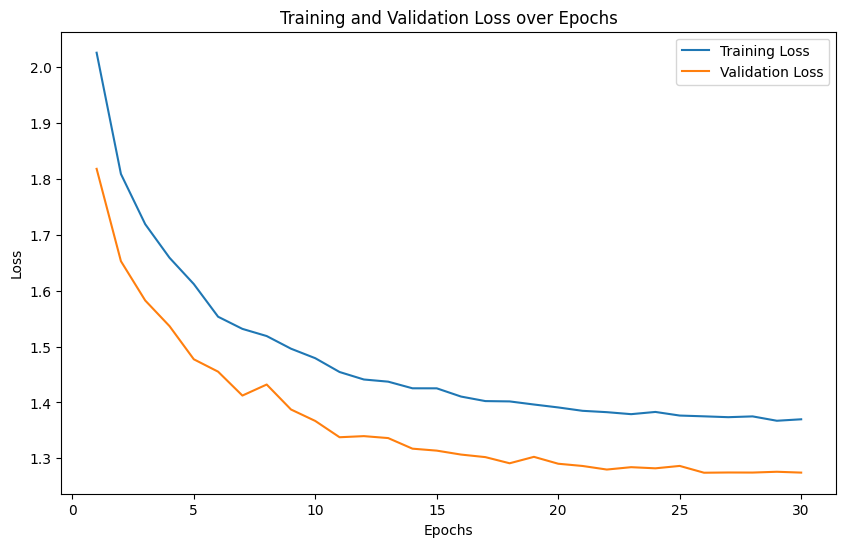

In [7]:
# Plot training and validation loss



plt.figure(figsize=(10, 6))



plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')



plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')



plt.xlabel('Epochs')



plt.ylabel('Loss')



plt.title('Training and Validation Loss over Epochs')



plt.legend()



plt.show()


In [8]:
# Check distribution of true labels and predicted labels



from collections import Counter







print("True labels distribution:", Counter(true_labels))



print("Predicted labels distribution:", Counter(preds))


True labels distribution: Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})
Predicted labels distribution: Counter({8: 1231, 6: 1187, 1: 1147, 7: 1140, 5: 1128, 9: 1030, 0: 878, 3: 843, 2: 827, 4: 589})


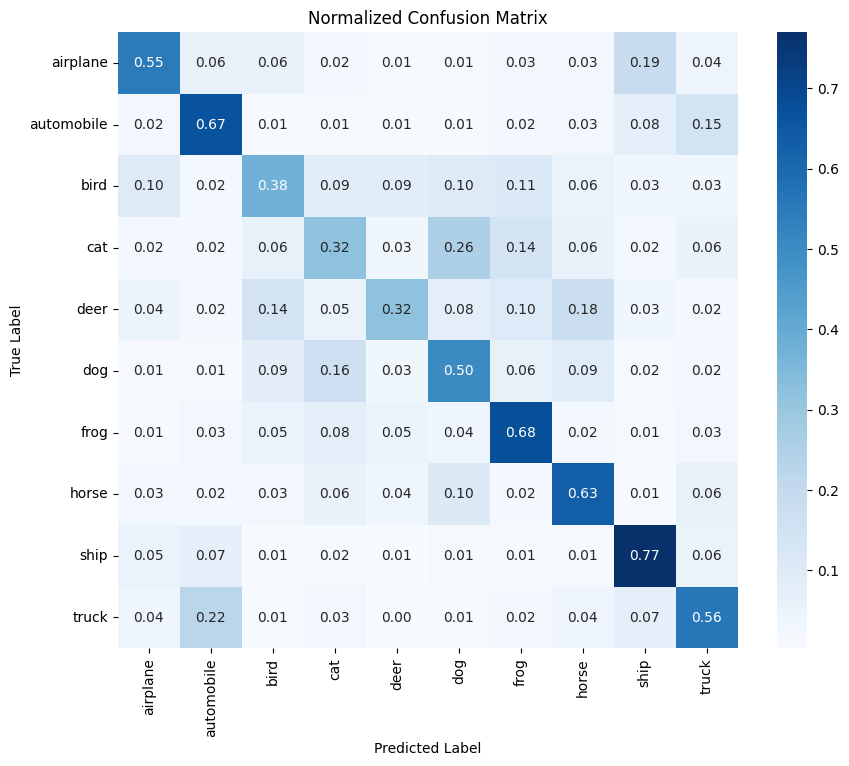

In [9]:
import torch

from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt



# Function to get predictions and true labels from the model

def get_predictions(model, loader):

    model.eval()  # Set model to evaluation mode

    all_preds = []

    all_labels = []



    # No gradient computation during evaluation

    with torch.no_grad():

        for images, labels in loader:

            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            _, preds = torch.max(outputs, 1)  # Get predicted class

            all_preds.extend(preds.cpu().numpy())

            all_labels.extend(labels.cpu().numpy())



    return all_labels, all_preds



# Function to plot the confusion matrix

def plot_confusion_matrix(true_labels, preds, class_names, normalize=False):

    # Generate the confusion matrix

    cm = confusion_matrix(true_labels, preds, labels=range(len(class_names)))

    

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)  # Normalize by true label counts



    # Plot the confusion matrix

    plt.figure(figsize=(10, 8))

    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues", 

                xticklabels=class_names, yticklabels=class_names)

    plt.xlabel("Predicted Label")

    plt.ylabel("True Label")

    plt.title("Normalized Confusion Matrix" if normalize else "Confusion Matrix")

    plt.show()



# Assuming `class_names` contains the names of the CIFAR-10 classes

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



# Example usage

true_labels, preds = get_predictions(model, test_loader)

plot_confusion_matrix(true_labels, preds, class_names, normalize=True)
